# Template Generation

**In the notebook, we demonstrate how to produce (or set) templates  noise PSD and save in a "filter" file used for the trigger and feature processing**

In [2]:
# import Template class from detprocess
from detprocess import Template

### Instantiate Template object

In [3]:
template_gen = Template(verbose=True)

### Create 2,3, or 4-poles template

In [4]:
# let's create a 2-pole and 4-pole template
# we need to specify trace and pretrigger length and sample rate
# A tag can be specified using argument "tag"

# IrPtTESSmall 4-poles
template_gen.create_template('IrPtTESSmall',
                             trace_length_msec=2, pretrigger_length_msec=0.5, sample_rate=1.25e6,
                             A=1,B=2, C=3, tau_r=20e-6, tau_f1=20e-6, tau_f2=40e-6, tau_f3=500e-6)
# IrPtTESBig 2-poles
template_gen.create_template('IrPtTESBig',
                             trace_length_msec=2, pretrigger_length_msec=0.5, sample_rate=1.25e6, 
                             tau_r=20e-6, tau_f1=50e-6)


INFO: Creating 4-poles template (tag="default")
INFO: Creating 2-poles template (tag="default")


### Plot template (s)

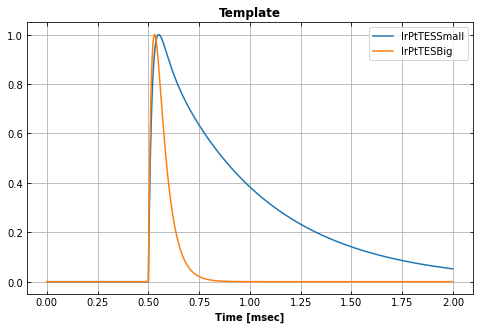

In [5]:
template_gen.plot_template(['IrPtTESSmall','IrPtTESBig'])

### Set template (s)

If you already have a template array, you can simply set it to template object

In [6]:
# For demo, let's get the template already created and set it with a different tag
template_array, t = template_gen.get_template('IrPtTESSmall')

# set (we need to specific pretrigger and sample rate as it is not known)
template_gen.set_template('IrPtTESSmall', template_array, sample_rate=1.25e6, 
                          pretrigger_length_msec=0.5, tag='demo')

# let's see what is stored
template_gen.describe()


Channel IrPtTESSmall:
 * Tag "default":
    template: pandas.Series (2500,)
 * Tag "demo":
    template: pandas.Series (2500,)

Channel IrPtTESBig:
 * Tag "default":
    template: pandas.Series (2500,)


### Save filte file

In [7]:
# let's save it in am existing filter file that already has noise PSD
file_name = './test_filter.hdf5'
template_gen.save_hdf5(file_name, overwrite=True)

INFO: Saving noise data to file ./test_filter.hdf5
INFO: channel data with same tag may be overwritten
Storing /IrPtTESSmall/template_default in ./test_filter.hdf5
Storing /IrPtTESSmall/template_demo in ./test_filter.hdf5
Storing /IrPtTESBig/template_default in ./test_filter.hdf5


In [8]:
# Let's load back filter file
template_gen.load_hdf5(file_name)
template_gen.describe()

INFO: Loading filter data from file ./test_filter.hdf5

Channel IrPtTESSmall:
 * Tag "default":
    template: pandas.Series (2500,)
    psd: pandas.Series (25000,)
    psd_fold: pandas.Series (12501,)
 * Tag "demo":
    template: pandas.Series (2500,)

Channel IrPtTESBig:
 * Tag "default":
    template: pandas.Series (2500,)
    psd: pandas.Series (25000,)
    psd_fold: pandas.Series (12501,)


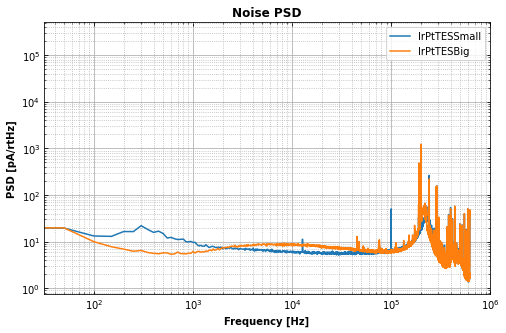

In [9]:
# we can also plot PSD with same object 
template_gen.plot_psd(['IrPtTESSmall','IrPtTESBig'], fold=True)